<a href="https://colab.research.google.com/github/Jahid11186/Entrepreneurial-Competency-Prediction/blob/main/Entrepreneurial_Competency_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Entrepreneurial Competency in University Students**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Project Setup**

In [ ]:
# Required libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/entrepreneurDataset/data.csv')

### **Data Exploration**

In [ ]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [ ]:
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [ ]:
df.y.value_counts()

0    128
1     91
Name: y, dtype: int64

In [ ]:
df.KeyTraits.unique()

array(['Passion', 'Vision', 'Resilience', 'Positivity', 'Work Ethic'],
      dtype=object)

In [ ]:
df.EducationSector.unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Language and Cultural Studies'],
      dtype=object)

In [ ]:
df.ReasonsForLack.unique()

array([nan,
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else)',
       'Not willing to start a venture in India and waiting for future relocation',
       'Not able to take a Financial Risk',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else), Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else), Academic Pressure, Parental Pressure',
       'Academic Pressure, Lack of Knowledge, Mental Block',
       'Lack of Knowledge',
       'Academic Pressure, Unwillingness to take risk, Lack of Knowledge',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or s

In [ ]:
df.ReasonsForLack = df.ReasonsForLack.fillna('No Reason')

In [ ]:
df.ReasonsForLack.unique()

array(['No Reason',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else)',
       'Not willing to start a venture in India and waiting for future relocation',
       'Not able to take a Financial Risk',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else), Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else), Academic Pressure, Parental Pressure',
       'Academic Pressure, Lack of Knowledge, Mental Block',
       'Lack of Knowledge',
       'Academic Pressure, Unwillingness to take risk, Lack of Knowledge',
       'Just not interested! (Want to work in the corporate sector, or for the government or pursue resea

In [ ]:
df.isnull().sum()

EducationSector           0
IndividualProject         0
Age                       0
Gender                    0
City                      0
Influenced                0
Perseverance              0
DesireToTakeInitiative    0
Competitiveness           0
SelfReliance              0
StrongNeedToAchieve       0
SelfConfidence            0
GoodPhysicalHealth        0
MentalDisorder            0
KeyTraits                 0
ReasonsForLack            0
y                         0
dtype: int64

In [ ]:
df['ReasonsForLack'] = df['ReasonsForLack'].str.replace('Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else)',
                                                        'Just not interested',regex=False)

In [ ]:
df.ReasonsForLack.unique()

array(['No reason', 'Just not interested',
       'Not willing to start a venture in India and waiting for future relocation',
       'Not able to take a Financial Risk',
       'Just not interested, Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk',
       'Just not interested, Academic Pressure, Parental Pressure',
       'Academic Pressure, Lack of Knowledge, Mental Block',
       'Lack of Knowledge',
       'Academic Pressure, Unwillingness to take risk, Lack of Knowledge',
       'Just not interested, Lack of Knowledge, Parental Pressure, Mental Block',
       'Unwillingness to take risk, Lack of Knowledge, Not able to take a Financial Risk',
       'Just not interested, Unwillingness to take risk, Lack of Knowledge',
       'Just not interested, Academic Pressure, Unwillingness to take risk, Lack of Knowledge, Parental Pressure, Not able to take a Financial Risk',
       'Acad

In [ ]:
df.ReasonsForLack

0                                              No Reason
1                                    Just not interested
2      Not willing to start a venture in India and wa...
3                      Not able to take a Financial Risk
4                                              No Reason
                             ...                        
214                                            No Reason
215               Just not interested, Academic Pressure
216                                            No Reason
217                                    Lack of Knowledge
218                                            No Reason
Name: ReasonsForLack, Length: 219, dtype: object

In [ ]:
df['ReasonsForLack'].str.split(', ', expand=True)[0].unique()

array(['No Reason', 'Just not interested',
       'Not willing to start a venture in India and waiting for future relocation',
       'Not able to take a Financial Risk', 'Academic Pressure',
       'Lack of Knowledge', 'Unwillingness to take risk',
       'Parental Pressure', 'Mental Block'], dtype=object)

In [ ]:
len(df['ReasonsForLack'].str.split(', ', expand=True)[0].unique())

9

In [ ]:
df['No Reason'] = df['ReasonsForLack'].str.contains('No Reason')
df['Just not interested'] = df['ReasonsForLack'].str.contains('Just not interested')
df['Unwilling to start venture'] = df['ReasonsForLack'].str.contains('Not willing to start a venture in India and waiting for future relocation')
df['Financial Risk'] = df['ReasonsForLack'].str.contains('Not able to take a Financial Risk')
df['Academic Pressure'] = df['ReasonsForLack'].str.contains('Academic Pressure')
df['Lack of Knowledge'] = df['ReasonsForLack'].str.contains('Lack of Knowledge')
df['Unwillingness to take risk'] = df['ReasonsForLack'].str.contains('Unwillingness to take risk')
df['Parental Pressure'] = df['ReasonsForLack'].str.contains('Parental Pressure')
df['Mental Block'] = df['ReasonsForLack'].str.contains('Mental Block')

In [ ]:
# plt.figure(figsize=(250, 50))

# entrepreneur = sns.countplot(x= "ReasonsForLack", hue='y', data=df, palette="Set1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EducationSector             219 non-null    object
 1   IndividualProject           219 non-null    object
 2   Age                         219 non-null    int64 
 3   Gender                      219 non-null    object
 4   City                        219 non-null    object
 5   Influenced                  219 non-null    object
 6   Perseverance                219 non-null    int64 
 7   DesireToTakeInitiative      219 non-null    int64 
 8   Competitiveness             219 non-null    int64 
 9   SelfReliance                219 non-null    int64 
 10  StrongNeedToAchieve         219 non-null    int64 
 11  SelfConfidence              219 non-null    int64 
 12  GoodPhysicalHealth          219 non-null    int64 
 13  MentalDisorder              219 non-null    object

In [ ]:
len(df[df['No Reason'] == True]) / 219 *100

41.55251141552511

In [ ]:
len(df[df['Just not interested'] == True]) / 219 *100

28.767123287671232

In [ ]:
len(df[df['Unwilling to start venture'] == True]) / 219 *100

8.21917808219178

In [ ]:
len(df[df['Financial Risk'] == True]) / 219 *100

15.068493150684931

In [ ]:
len(df[df['Academic Pressure'] == True]) / 219 *100

16.43835616438356

In [ ]:
len(df[df['Lack of Knowledge'] == True]) / 219 *100

20.091324200913242

In [ ]:
len(df[df['Unwillingness to take risk'] == True]) / 219 *100

7.30593607305936

In [ ]:
len(df[df['Parental Pressure'] == True]) / 219 *100

6.392694063926941

In [ ]:
len(df[df['Mental Block'] == True]) / 219 *100

4.10958904109589

In [ ]:
df = df.drop('ReasonsForLack', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EducationSector             219 non-null    object
 1   IndividualProject           219 non-null    object
 2   Age                         219 non-null    int64 
 3   Gender                      219 non-null    object
 4   City                        219 non-null    object
 5   Influenced                  219 non-null    object
 6   Perseverance                219 non-null    int64 
 7   DesireToTakeInitiative      219 non-null    int64 
 8   Competitiveness             219 non-null    int64 
 9   SelfReliance                219 non-null    int64 
 10  StrongNeedToAchieve         219 non-null    int64 
 11  SelfConfidence              219 non-null    int64 
 12  GoodPhysicalHealth          219 non-null    int64 
 13  MentalDisorder              219 non-null    object

In [ ]:
df.head(10)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y,No Reason,Just not interested,Unwilling to start venture,Financial Risk,Academic Pressure,Lack of Knowledge,Unwillingness to take risk,Parental Pressure,Mental Block
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1,True,False,False,False,False,False,False,False,False
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0,False,True,False,False,False,False,False,False,False
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0,False,False,True,False,False,False,False,False,False
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0,False,False,False,True,False,False,False,False,False
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1,True,False,False,False,False,False,False,False,False
5,Engineering Sciences,No,19,Male,Yes,Yes,3,3,3,3,3,3,3,No,Positivity,1,True,False,False,False,False,False,False,False,False
6,Engineering Sciences,Yes,19,Male,Yes,Yes,3,2,3,3,4,1,1,No,Work Ethic,1,True,False,False,False,False,False,False,False,False
7,Engineering Sciences,No,20,Male,Yes,Yes,4,2,4,4,5,3,4,Yes,Work Ethic,0,False,True,False,True,True,True,False,False,False
8,Others,Yes,20,Male,Yes,Yes,2,3,3,1,2,2,2,No,Passion,0,False,False,False,True,True,True,False,False,False
9,Engineering Sciences,Yes,17,Male,Yes,Yes,2,3,2,1,4,3,3,Yes,Work Ethic,1,True,False,False,False,False,False,False,False,False


### **Visualization**

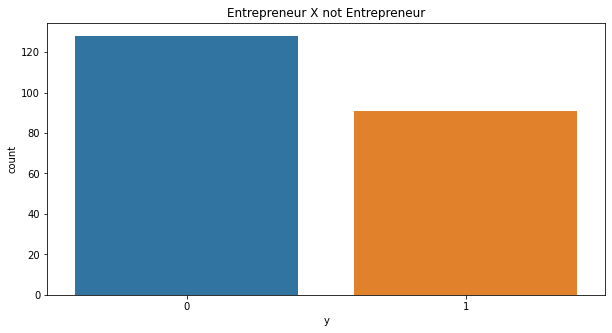

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Entrepreneur X not Entrepreneur')
sns.countplot(data=df, x='y');

### **Modeling**

In [ ]:
X = df.drop('y', axis=1)
y = df['y']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
acc = model.score(X_test, y_test) * 100
print("Accuracy: ", acc, '%')

Accuracy:  100.0 %


### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model2.score(X_test, y_test)

0.8909090909090909

In [ ]:
acc = model2.score(X_test, y_test) * 100
print("Accuracy: ", acc, '%')

Accuracy:  89.0909090909091 %


### **Support Vector Machine**

In [ ]:
from sklearn.svm import  SVC

In [ ]:
model3 = SVC()
model3.fit(X_train, y_train)
model3.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model3.score(X_test, y_test)

1.0

### **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
model4.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model4.score(X_test, y_test)

1.0

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train, y_train)
model5.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model5.score(X_test, y_test)

1.0